<div align="left">
<img align="left" src="datasciencebowl.png" >
<div> <b> Kaggle </b></div>
<div> 2018 Data Science Bowl </div>
<div> Pedro D. Marrero Fernandez</div>
<div> https://www.kaggle.com/c/data-science-bowl-2018/discussion/47770 </div>
<div> :), :(, :/</div>
</div>

In [1]:
import os
import torch
import pandas as pd
from skimage import io, transform
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils
import csv
from skimage import color
import scipy.misc

from deep.datasets import imageutl as imutl
from deep.datasets import utility as utl
from deep.datasets import weightmaps 
from deep import visualization as view


# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

plt.ion()   # interactive mode

# Train dataset loader

In [2]:
pathdataset = '../db'
namedataset = 'databoewl'
metadata = 'stage1_train_labels.csv'
pathname = os.path.join(pathdataset, namedataset);
pathmetadata = os.path.join(pathdataset, namedataset, metadata)

base_folder = pathname
sub_folder =  imutl.trainfile
id_file_name = metadata
folders_image='images'
folders_masks='masks'

dataloader = imutl.dsxbProvide.create(
    base_folder, 
    sub_folder, 
    id_file_name, 
    folders_image, 
    folders_masks
    )

print(len(dataloader))
print(':)!!!')

670
:)!!!


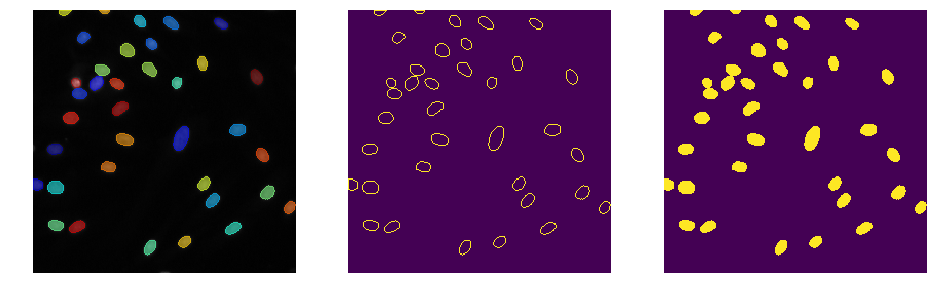

1
(256, 256, 3)


In [3]:
i=1
image, label = dataloader[ i ]

imagecell = view.makeimagecell(image, label, alphaback=0.5, alphaedge=0.5)
imageedge = view.makeedgecell(label)
imageback = view.makebackgroundcell(label)

maskedge = np.sum(imageedge,axis=2)>0
maskback = np.sum(imageback,axis=2)>0

plt.figure( figsize=(16,16))
plt.subplot(131)
plt.imshow( imagecell )
plt.axis('off')
plt.subplot(132)
plt.imshow( maskedge )
plt.axis('off')
plt.subplot(133)
plt.imshow( maskback )
plt.axis('off')


plt.show()

print(i)
print(image.shape)


# Test dataset loader

In [2]:

pathdataset = '../db'
namedataset = 'databoewl'
pathname = os.path.join(pathdataset, namedataset);

base_folder = pathname
sub_folder =  imutl.testfile
folders_image='images'

dataloader = imutl.dsxbImageProvide.create(
    base_folder, 
    sub_folder, 
    folders_image, 
    )

print(len(dataloader))
print(':)!!!')


65
:)!!!


In [ ]:
image = dataloader[ 0 ]

plt.figure( figsize=(10,10))
plt.imshow( image )
plt.title('Image test: {}'.format( dataloader.getid() ) )
plt.axis('off')
plt.show()



In [4]:
import scipy.misc

n = len(dataloader)
sizes = np.zeros((n,2))
for i in range( n ):
    image = dataloader.getimage(i)
    print(dataloader.getid())
    sizes[i,...] = image.shape[:2]
    scipy.misc.imsave(os.path.join('./runs', 'images', '{:06d}_{}x{}_{}.png'.format(
        i,image.shape[0],image.shape[1], dataloader.getid()  )), 
        image);


00071198d059ba7f5914a526d124d28e6d010c92466da21d4a04cd5413362552
003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1
00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e
0121d6759c5adb290c8e828fc882f37dfaf3663ec885c663859948c154a443ed
01d44a26f6680c42ba94c9bc6339228579a95d0e2695b149b7cc0c9592b21baf
0280fa8f60f6bcae0f97d93c28f60be194f9309ff610dc5845e60455b0f87c21
0287e7ee5b007c91ae2bd7628d09735e70496bc6127ecb7f3dd043e04ce37426
02903040e19ddf92f452907644ad3822918f54af41dd85e5a3fe3e1b6d6f9339
03398329ced0c23b9ac3fac84dd53a87d9ffe4d9d10f1b5fe8df8fac12380776
03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe
03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a
0402a81e75262469925ea893b6706183832e85324f7b1e08e634129f5d522cdd
04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e
05040e2e959c3f5632558fc9683fec88f0010026c555b499066346f67fdd0e13
0532c64c2fd0c4d3188cc751cdfd566b1cfba3d269358717295bab1504c7c275
05a8f65ebd0b30d3b210f30b4

In [5]:

g = 1
grups = ['a','b','c','d','e','f','g']

for g in range( len(grups) ):

    print('grup: ', grups[g])

    pathname='./runs/grups/{}'.format(grups[g])
    files = [ int(f[3:9]) for f in sorted(os.listdir(pathname)) if f.split('.')[-1] == 'png' ]
    np.savetxt('grup_{}.txt'.format(grups[g]), files, fmt="%d", delimiter=",")

    print( files )
    print( len(files) )
    print('----')


grup:  a
[23, 25, 65, 69, 112, 150, 178, 211, 225, 258, 261, 315, 340, 368, 379, 523]
16
----
grup:  b
[4, 32, 37, 39, 49, 52, 80, 96, 97, 103, 125, 129, 140, 156, 161, 166, 172, 182, 191, 197, 202, 203, 205, 209, 213, 221, 240, 254, 262, 279, 283, 287, 289, 296, 298, 306, 307, 312, 321, 346, 352, 372, 392, 413, 417, 426, 433, 440, 441, 444, 454, 457, 460, 462, 468, 492, 504, 505, 511, 518, 539, 540, 594, 615, 647, 652]
66
----
grup:  c
[89, 222, 421, 538, 633, 638]
6
----
grup:  d
[0, 1, 5, 6, 8, 11, 12, 13, 15, 16, 18, 19, 20, 21, 24, 26, 27, 28, 29, 30, 31, 33, 35, 38, 41, 42, 44, 45, 46, 47, 48, 50, 51, 53, 56, 59, 60, 61, 62, 63, 64, 67, 68, 70, 71, 73, 74, 75, 77, 78, 79, 81, 82, 84, 86, 87, 88, 90, 91, 92, 93, 94, 95, 98, 99, 100, 101, 102, 104, 105, 109, 110, 111, 114, 115, 116, 117, 118, 120, 122, 123, 124, 126, 127, 128, 130, 131, 132, 133, 134, 135, 136, 137, 141, 143, 144, 145, 147, 148, 149, 151, 152, 153, 154, 155, 158, 159, 160, 162, 163, 164, 165, 167, 169, 170, 171, 17

In [10]:

g = 5
grups = ['a','b','c','d','e','f','g']
files = np.loadtxt('grup_{}.txt'.format(grups[g]), delimiter=",")
files = np.array(files).astype(np.uint32)
print(files)
print(files.shape)

[176 237 356 376]
(4,)


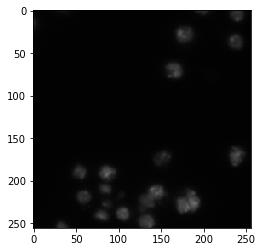

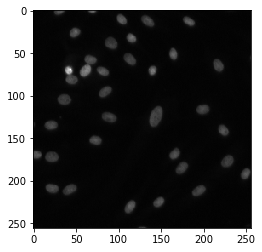

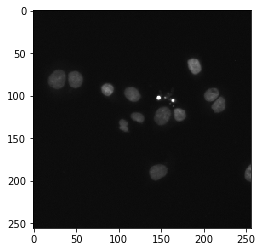

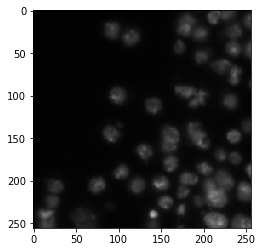

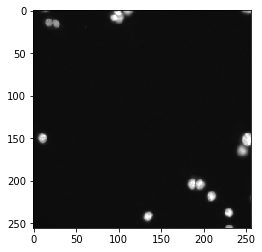

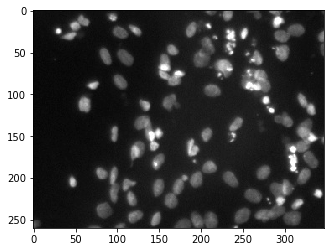

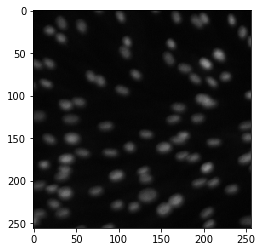

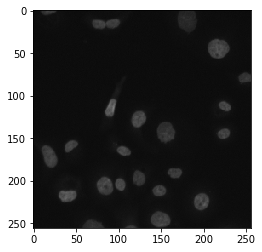

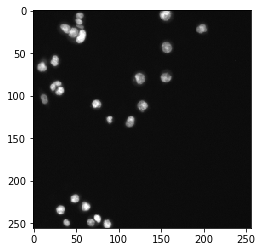

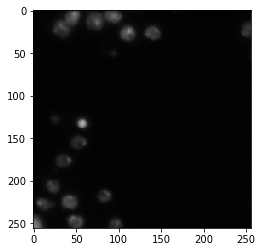

In [12]:
n = len(dataloader)
sizes = np.zeros((n,2))
for i in range( 10 ):
    #print(files[i] )
    image = dataloader.getimage( files[i] )
    plt.imshow(image)
    plt.show()
    

Total: 670

|T   | N   | Size     |
|----|-----|----------|
| a  | 16  | 1024x1024|
| b  | 108 | 256x320  |
| c  | 6   | 603x1272 |
| d  | 449 |          |
| e  | 91  | 360x360  |


In [37]:
#16+108+6+454+86
frec = np.array([16,108,6,449,91])
print( frec/np.sum(frec)*100 )
print( np.sum(frec) )

[  2.3880597   16.11940299   0.89552239  67.01492537  13.58208955]
670


# Weigth Map Calculate
## compute the wieght map for data set

Unet implementation: 

- https://arxiv.org/pdf/1505.04597.pdf


Kaggle reference: 

- https://www.kaggle.com/piotrczapla/tensorflow-u-net-starter-lb-0-34/notebook
     
 
Ecuation:

$$ w(x) = w_c(x) + w_0*\exp(-\frac{(d_1(x)-d_2(x))^2}{2\sigma^2}) $$

In [187]:
from skimage import io, transform, morphology, filters
from scipy import ndimage

#weight map
def getweightmap(mask):
    
    assert mask.size > 0
    w_c = np.empty(mask.shape)
    
    frac0 = np.sum(mask == 0) / float(mask.size)
    frac1 = np.sum(mask == 1) / float(mask.size)
    
    assert frac0 > 0
    assert frac1 > 0

    # Calculate
    w_c[mask == 0] = 0.5 / (frac0)
    w_c[mask == 1] = 0.5 / (frac1)
    
    return w_c

# GETWEIGHTMAP: compute the wieght map for data set
#
# @param masks
# @param w0
# @param sigma
#
# @Ref: https://arxiv.org/pdf/1505.04597.pdf
# Ecuation 2
#
# w(x) = w_c(x) + w_0*\exp(-\frac{(d_1(x)-d_2(x))^2}{2\sigma^2}) 
#
# where w_c : Ω → R is the weight map to balance the class frequencies, 
# d_1 : Ω → R denotes the distance to the border of the nearest cell and 
# d_2 : Ω → R the distance to the border of the second nearest cell. 
# In our experiments we set w0 = 10 and σ ≈ 5 pixels.
#


#https://www.kaggle.com/piotrczapla/tensorflow-u-net-starter-lb-0-34/notebook
def getunetweightmap( merged_mask, masks, w0=10, sigma=5, ):
    
    # WxHxN to NxWxH
    masks = masks.transpose( (2,0,1) )
    
    weight = np.zeros(merged_mask.shape)
    # calculate weight for important pixels
    distances = np.array([ndimage.distance_transform_edt(m==0) for m in masks])
    shortest_dist = np.sort(distances, axis=0)
    # distance to the border of the nearest cell 
    d1 = shortest_dist[0]
    # distance to the border of the second nearest cell
    d2 = shortest_dist[1] if len(shortest_dist) > 1 else np.zeros(d1.shape)

    w_b = np.exp(-(d1+d2)**2/(2*sigma**2)).astype(np.float32)
    w_c = getweightmap(merged_mask)
    w = w_c + w0*w_b;
    
    #weight = 1 + (merged_mask == 0) * w
    weight = w
    
    
    return weight

def binary_erosion(img):
    img = ndimage.morphology.binary_erosion((img > 0 ), border_value=1).astype(np.uint8)
    return img

def binary_dilate(img):
    img = ndimage.morphology.binary_dilation((img > 0 ), border_value=1).astype(np.uint8)
    return img


(520, 696)
(520, 696)


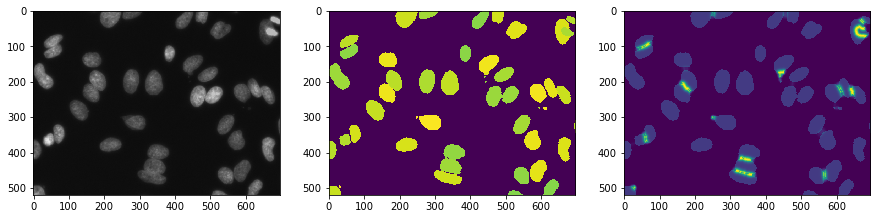

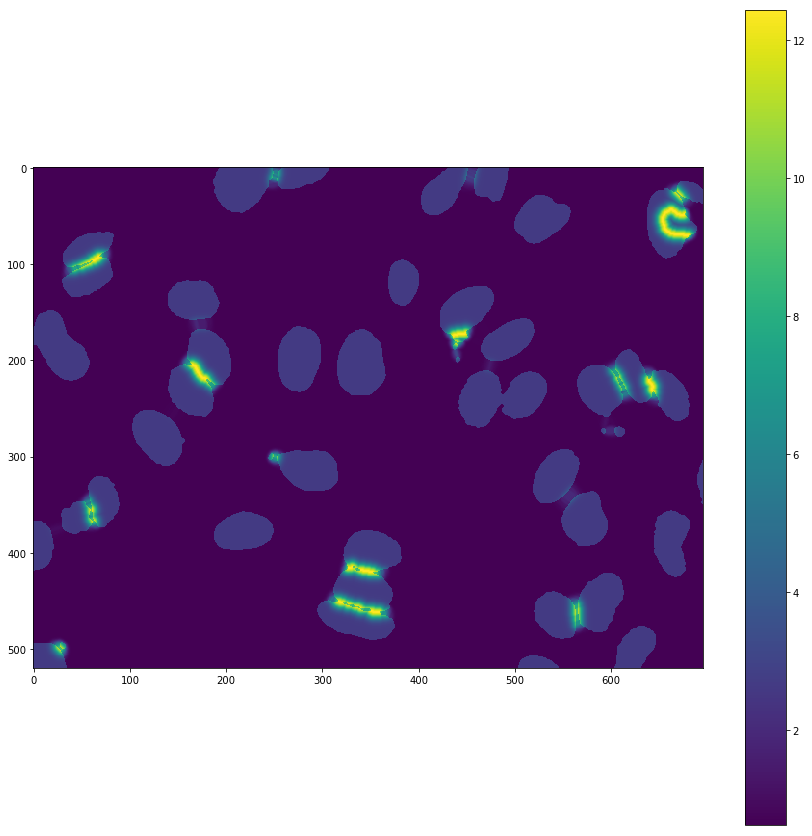

In [197]:

image, label = dataloader[ 2 ]
mask = (label>0).astype(np.float)
merged_mask = np.max(mask,axis=2)

weight = getunetweightmap( merged_mask, mask, w0=10, sigma=5, )
print(weight.shape)
print(np.sum( label, axis=2 ).shape)

plt.figure( figsize=(15,15) )
plt.subplot(131)
plt.imshow(image)
plt.subplot(132)
plt.imshow( np.sum( label, axis=2 ) )
plt.subplot(133)
plt.imshow( weight  )
#plt.colorbar()
plt.show()


plt.figure( figsize=(15,15) )
plt.imshow( weight  )
plt.colorbar()
plt.show()


(520, 696, 48)
0 1


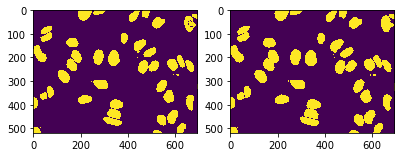

In [198]:
maskerode = np.array([ binary_erosion(x) for x in mask.transpose((2,1,0)) ]).transpose( (2,1,0) )
print(maskerode.shape)
print(np.min(maskerode), np.max(maskerode))

plt.figure( figsize=(10,10) )
plt.subplot(131)
plt.imshow( np.max( maskerode, axis=2 ) )
plt.subplot(132)
plt.imshow( np.max( mask, axis=2 ) )
plt.show()

(520, 696, 48)
0 1


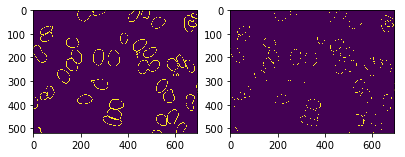

In [199]:

imageedge = view.makeedgecell(label)
maskedge = (np.max(imageedge,axis=2)>0).astype(np.float)

#maskdialet = np.array([ binary_dilate(x) for x in mask.transpose((2,1,0)) ]).transpose( (2,1,0) )
maskdialet =  binary_dilate(maskedge)

print(maskerode.shape)
print(np.min(maskdialet), np.max(maskdialet))

plt.figure( figsize=(10,10) )
plt.subplot(131)
plt.imshow( maskdialet ) #np.max( maskdialet, axis=2 )
plt.subplot(132)
plt.imshow( maskedge ) #np.max( mask, axis=2 )
plt.show()

In [ ]:
merged_mask = np.max(mask,axis=2)
print(merged_mask.shape)
print(np.min(merged_mask), np.max(merged_mask))

plt.imshow( merged_mask  )
#plt.colorbar()
plt.show()

## Export steps

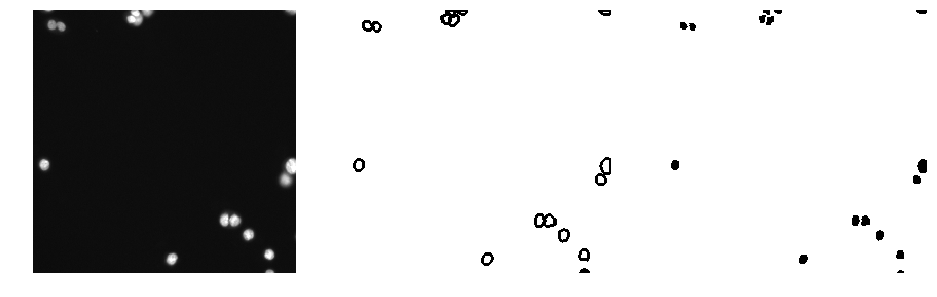

In [4]:

image, label = dataloader[ 8 ]

masks = (label>0).astype(np.uint32)
maskedges = np.array([ utl.contours(x) for x in masks.transpose((2,0,1)) ]).transpose( (1,2,0) )


# preprocessing

maskback = np.array([ utl.binary_erosion(x) for x in masks.transpose((2,0,1)) ]).transpose( (1,2,0) )
maskback = (np.max(maskback,axis=2)>0).astype(np.float)
maskedges = np.array([ utl.binary_dilate(x) for x in maskedges.transpose((2,0,1)) ]).transpose( (1,2,0) )
maskedges = (np.max(maskedges,axis=2)>0).astype(np.float)

merged_mask = (np.max(masks,axis=2)>0).astype(np.float)

plt.figure( figsize=(16,16))
plt.subplot(131)
plt.imshow( image, cmap='gray' )
plt.axis('off')
plt.subplot(132)
plt.imshow( 1-maskedges, cmap='gray' )
plt.axis('off')
plt.subplot(133)
plt.imshow( 1-maskback, cmap='gray' )
plt.axis('off')


plt.show()


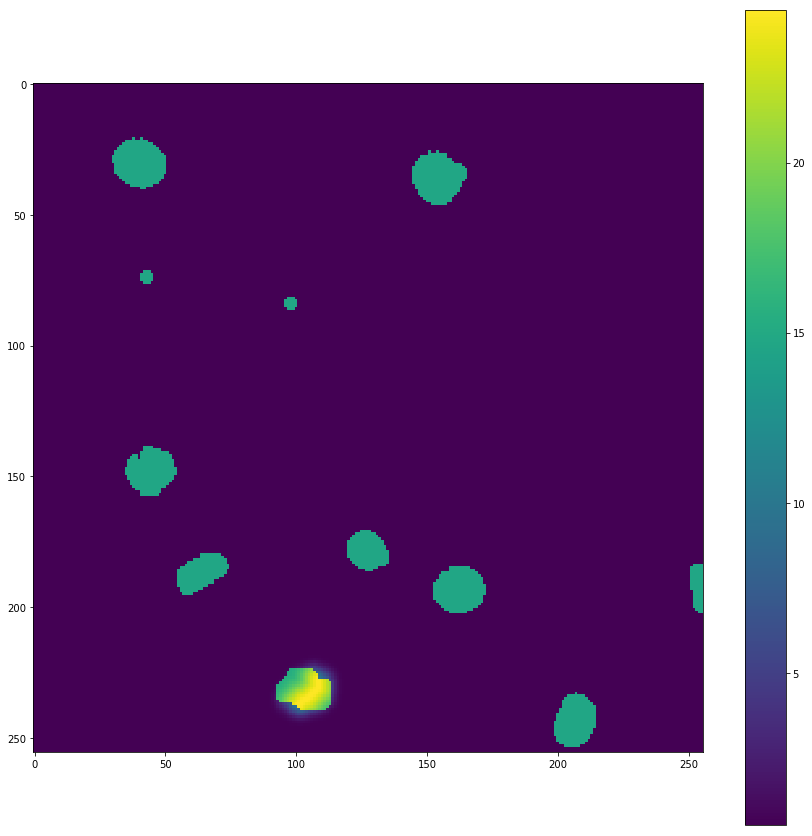

In [22]:
weight = weightmaps.getunetweightmap( merged_mask, masks, w0=10, sigma=5, )

plt.figure( figsize=(15,15) )
plt.imshow( weight  )
plt.colorbar()
plt.show()


# Save dataset in disk

In [6]:
def size_transform(imagein, size=512, mode=None):

    height, width = imagein.shape;
    image = np.array(imagein.copy())

    asp = float(height)/width;
    w = size; 
    h = int(w*asp);

    image_x = scipy.misc.imresize(image, (h,w), interp='bilinear', mode=mode);
    
    image = np.zeros((w,w));
    ini = int(round((w-h)/2.0));
    image[ini:h+ini,:] = image_x;

    return image

Image:  0.0 252.0 (512, 512)
Back:  0.0 1.0 (512, 512)
Edge:  0.0 1.0 (512, 512)
Weigth:  0.538956224918 16.7194442749 (512, 512)


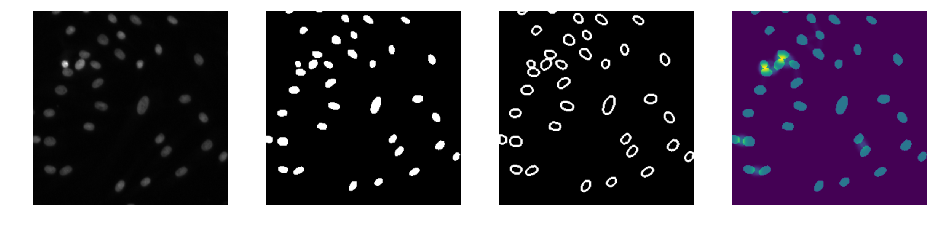

In [7]:

imsize = 512
image, label = dataloader[ 1 ]

masks = (label>0).astype(np.uint32)
maskedges = np.array([ utl.contours(x) for x in masks.transpose((2,0,1)) ]).transpose( (1,2,0) )

# preprocessing
image =  color.rgb2gray(image)
maskback = np.array([ utl.binary_erosion(x) for x in masks.transpose((2,0,1)) ]).transpose( (1,2,0) )
maskback = (np.max(maskback,axis=2)>0).astype(np.float)
maskedges = np.array([ utl.binary_dilate(x) for x in maskedges.transpose((2,0,1)) ]).transpose( (1,2,0) )
maskedges = (np.max(maskedges,axis=2)>0).astype(np.float)
merged_mask = (np.max(masks,axis=2)>0).astype(np.float)
weight = weightmaps.getunetweightmap( merged_mask, masks, w0=10, sigma=5, )


# resize
image_t = size_transform(image, size=imsize, mode=None)
maskback_t = size_transform(maskback, size=imsize, mode='F')
maskedges_t = size_transform(maskedges, size=imsize, mode='F')
weight_t = size_transform(weight, size=imsize, mode='F')


print('Image: ', np.min(image_t), np.max(image_t), image_t.shape  )
print('Back: ', np.min(maskback_t), np.max(maskback_t), maskback_t.shape  )
print('Edge: ', np.min(maskedges_t), np.max(maskedges_t), maskedges_t.shape  )
print('Weigth: ', np.min(weight_t), np.max(weight_t), weight_t.shape  )


plt.figure( figsize=(16,16) )
plt.subplot(141)
plt.imshow(image_t, cmap='gray')
plt.axis('off')
plt.subplot(142)
plt.imshow(maskback_t, cmap='gray')
plt.axis('off')
plt.subplot(143)
plt.imshow(maskedges_t, cmap='gray')
plt.axis('off')
plt.subplot(144)
plt.imshow(weight_t)
plt.axis('off')

plt.show()


In [8]:
im = np.zeros((imsize,imsize,3))
im[:,:,0] = maskback_t
im[:,:,1] = 1-maskback_t
im[:,:,2] = maskedges_t

scipy.misc.imsave(os.path.join('./runs', 'aug{:06d}.png'.format(1)), im )

Back:  0 255 (512, 512)
Edge:  0 255 (512, 512)


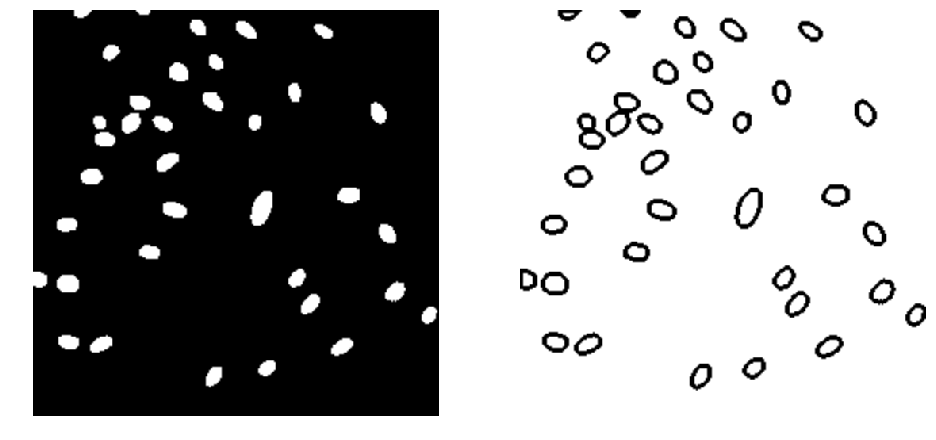

In [9]:
im = scipy.misc.imread(os.path.join('./runs', 'aug{:06d}.png'.format(1)))
imback = im[:,:,0]
imedge = im[:,:,2]

print('Back: ', np.min(imback), np.max(imback), imback.shape  )
print('Edge: ', np.min(imedge), np.max(imedge), maskedges_t.shape  )

plt.figure( figsize=(16,16) )
plt.subplot(121)
plt.imshow(imback, cmap='gray')
plt.axis('off')
plt.subplot(122)
plt.imshow(255-imedge, cmap='gray')
plt.axis('off')
plt.show()


In [43]:
np.savetxt(os.path.join('./runs', 'aug{:06d}.txt'.format(1)), weight_t, fmt="%2.3f", delimiter=",")

Image:  0.548 15.536 (512, 512)


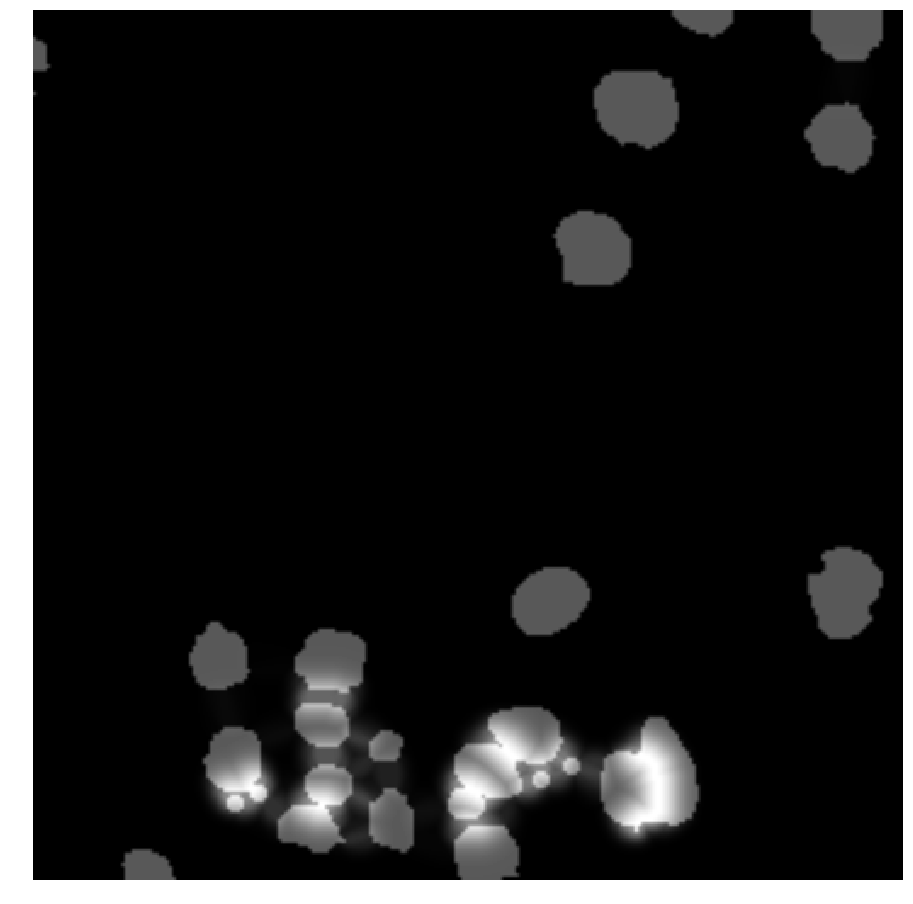

In [17]:
im = np.loadtxt(os.path.join('./runs/dataset/d/weights/', 'aug{:06d}.txt'.format(0)), delimiter=",")

print('Image: ', np.min(im), np.max(im), im.shape  )

plt.figure( figsize=(16,16) )
plt.imshow(im, cmap='gray')
plt.axis('off')
plt.show()



# Extend load datset

In [5]:
pathdataset     = '../db'
namedataset     = 'databoewlex'
sub_folder      = '.'
folders_images  = 'images'
folders_labels  = 'labels'
folders_weights = 'weights'

pathname = os.path.join(pathdataset, namedataset);
dataloader = imutl.dsxbExProvide(
    pathname, 
    sub_folder, 
    folders_images, 
    folders_labels,
    folders_weights,
    'png'
    )

print(len(dataloader))
print(':)!!!')

10
:)!!!


Image:  0 255 (256, 256)
Back:  0 255 (256, 256, 3)
Weigth:  0.548 15.536 (256, 256)


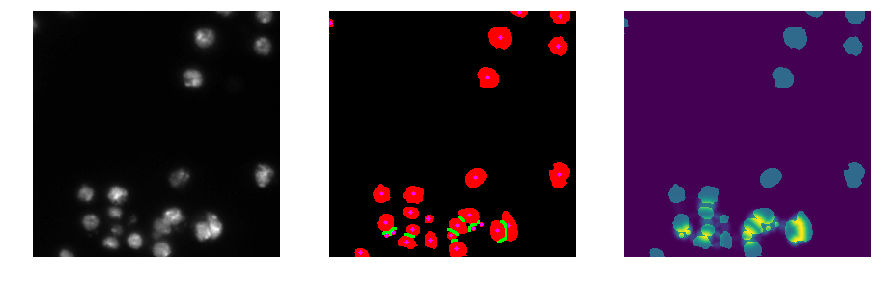

In [23]:

image, label, weight = dataloader[  np.random.randint( len(dataloader) )  ]

print('Image: ', np.min(image), np.max(image), image.shape  )
print('Back: ', np.min(label), np.max(label), label.shape  )
print('Weigth: ', np.min(weight), np.max(weight), weight.shape  )


plt.figure( figsize=(15,15) )
plt.subplot(131)
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.subplot(132)
plt.imshow(label)
plt.axis('off')
plt.subplot(133)
plt.imshow(weight)
plt.axis('off')


plt.show()


